<a href="https://colab.research.google.com/github/NaimurRahmanR/StartUpSuccessPredictor/blob/main/CO2Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Load the datasets
co2_data_path = '/content/API_EN.CO2.MANF.ZS_DS2_en_csv_v2_2754.csv'
metadata_country_path = '/content/Metadata_Country_API_EN.CO2.MANF.ZS_DS2_en_csv_v2_2754.csv'
metadata_indicator_path = '/content/Metadata_Indicator_API_EN.CO2.MANF.ZS_DS2_en_csv_v2_2754.csv'
# Reading the CO2 emissions data
co2_data = pd.read_csv(co2_data_path)

# Reading the metadata for countries
metadata_country = pd.read_csv(metadata_country_path)
# Reading the metadata for indicators
metadata_indicator = pd.read_csv(metadata_indicator_path)

# Displaying the first few rows of each dataset to understand their structure
(co2_data.head(), metadata_country.head(), metadata_indicator.head())


(                  Country Name Country Code  \
 0                        Aruba          ABW   
 1  Africa Eastern and Southern          AFE   
 2                  Afghanistan          AFG   
 3   Africa Western and Central          AFW   
 4                       Angola          AGO   
 
                                       Indicator Name  Indicator Code  1960  \
 0  CO2 emissions from manufacturing industries an...  EN.CO2.MANF.ZS   NaN   
 1  CO2 emissions from manufacturing industries an...  EN.CO2.MANF.ZS   NaN   
 2  CO2 emissions from manufacturing industries an...  EN.CO2.MANF.ZS   NaN   
 3  CO2 emissions from manufacturing industries an...  EN.CO2.MANF.ZS   NaN   
 4  CO2 emissions from manufacturing industries an...  EN.CO2.MANF.ZS   NaN   
 
    1961  1962  1963  1964  1965  ...       2014  2015  2016  2017  2018  2019  \
 0   NaN   NaN   NaN   NaN   NaN  ...        NaN   NaN   NaN   NaN   NaN   NaN   
 1   NaN   NaN   NaN   NaN   NaN  ...  13.032239   NaN   NaN   NaN   N

In [11]:
# Attempt to read the CO2 data again, skipping initial rows that might be causing the issue
try:
    co2_data = pd.read_csv(co2_data_path, skiprows=4)
    print("Successfully read CO2 data with skipping initial rows.")
except Exception as e:
    print(f"Failed to read CO2 data with error: {e}")

# Attempting to inspect the first few lines of the file to understand its structure
first_lines = []
with open(co2_data_path, 'r') as file:
    for _ in range(5):
        first_lines.append(file.readline().strip())

first_lines


Successfully read CO2 data with skipping initial rows.


['\ufeff"Data Source","World Development Indicators",',
 '',
 '"Last Updated Date","2024-02-21",',
 '',
 '"Country Name","Country Code","Indicator Name","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971","1972","1973","1974","1975","1976","1977","1978","1979","1980","1981","1982","1983","1984","1985","1986","1987","1988","1989","1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022",']

In [4]:
# It seems there was an error in the previous attempt to read the metadata files. Let's try reading them again.
metadata_country = pd.read_csv(metadata_country_path)
metadata_indicator = pd.read_csv(metadata_indicator_path)

# Displaying the first few rows of each metadata file
(metadata_country.head(), metadata_indicator.head())


(  Country Code                     Region          IncomeGroup  \
 0          ABW  Latin America & Caribbean          High income   
 1          AFE                        NaN                  NaN   
 2          AFG                 South Asia           Low income   
 3          AFW                        NaN                  NaN   
 4          AGO         Sub-Saharan Africa  Lower middle income   
 
                                         SpecialNotes  \
 0                                                NaN   
 1  26 countries, stretching from the Red Sea in t...   
 2  The reporting period for national accounts dat...   
 3  22 countries, stretching from the westernmost ...   
 4  The World Bank systematically assesses the app...   
 
                      TableName  Unnamed: 5  
 0                        Aruba         NaN  
 1  Africa Eastern and Southern         NaN  
 2                  Afghanistan         NaN  
 3   Africa Western and Central         NaN  
 4                    

In [5]:
# Step 1: Cleaning Data
# Checking for missing values in the CO2 emissions data
missing_values = co2_data.isnull().sum()

# Getting a summary of statistics for the numeric columns to understand the distribution
data_summary = co2_data.describe()

(missing_values, data_summary)


(Country Name        0
 Country Code        0
 Indicator Name      0
 Indicator Code      0
 1960              220
                  ... 
 2019              266
 2020              266
 2021              266
 2022              266
 Unnamed: 67       266
 Length: 68, dtype: int64,
             1960       1961       1962       1963       1964       1965  \
 count  46.000000  46.000000  46.000000  46.000000  46.000000  47.000000   
 mean   28.188770  27.933059  27.166452  27.474467  27.306686  27.498998   
 std    10.349106   9.722381   9.279522   8.915166   9.461147   9.686781   
 min    13.675214  16.521739  16.129032  17.322835  17.209649  16.596105   
 25%    20.095408  19.195612  18.726336  20.256284  18.493308  19.393224   
 50%    28.148335  27.483200  26.742363  26.952632  26.753881  26.564977   
 75%    35.096296  34.328881  32.316729  32.593226  32.747882  32.708944   
 max    62.893753  64.255544  64.324619  61.954518  63.509587  67.251462   
 
             1966       1967      

In [6]:
# Removing the "Unnamed: 67" column
co2_data_cleaned = co2_data.drop(columns=['Unnamed: 67'])

# Since there's a significant amount of missing data for recent years, and imputation might not be accurate without a clear pattern,
# we'll focus on years with more complete data. For this analysis, let's consider data up to 2014,
# which seems to be the last year with a substantial amount of data.
co2_data_reduced = co2_data_cleaned.loc[:, :'2014']

# Check for countries with consistently high amounts of missing data and consider removing them if necessary
missing_values_by_country = co2_data_reduced.isnull().sum(axis=1)
high_missing_data_countries = missing_values_by_country[missing_values_by_country > (co2_data_reduced.shape[1] - 10)] # Countries missing more than 10 years of data

# Reviewing the shape of the cleaned dataset and the countries with high missing data
(co2_data_reduced.shape, high_missing_data_countries)


((266, 59),
 0      55
 2      55
 6      55
 11     55
 12     55
        ..
 253    55
 255    55
 256    55
 258    55
 260    55
 Length: 78, dtype: int64)

In [12]:
# Excluding countries with high amounts of missing data
co2_data_refined = co2_data_reduced.drop(index=high_missing_data_countries.index)

# Merging the refined CO2 data with country metadata
# We'll use 'Country Code' for merging as it's a unique identifier present in both datasets.
co2_data_merged = pd.merge(co2_data_refined, metadata_country[['Country Code', 'Region', 'IncomeGroup']], on='Country Code', how='left')

# Checking the first few rows of the merged dataset to ensure the merge was successful
co2_data_merged.head()


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,Region,IncomeGroup
0,Africa Eastern and Southern,AFE,CO2 emissions from manufacturing industries an...,EN.CO2.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,12.199324,11.325804,15.435278,13.713098,12.595571,12.270974,12.691466,13.032239,NaN,NaN
1,Africa Western and Central,AFW,CO2 emissions from manufacturing industries an...,EN.CO2.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.702552,10.501696,8.957452,7.765668,12.467917,11.073301,11.622648,12.652729,NaN,NaN
2,Angola,AGO,CO2 emissions from manufacturing industries an...,EN.CO2.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.547718,17.781541,15.789474,15.532056,15.174129,13.963682,9.070796,7.772021,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,CO2 emissions from manufacturing industries an...,EN.CO2.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.931217,13.477089,20.689655,26.463104,26.811594,18.390805,15.934066,22.087379,Europe & Central Asia,Upper middle income
4,Arab World,ARB,CO2 emissions from manufacturing industries an...,EN.CO2.MANF.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.719009,20.261630,19.725739,20.868668,20.829596,20.468677,20.260031,19.531756,NaN,NaN


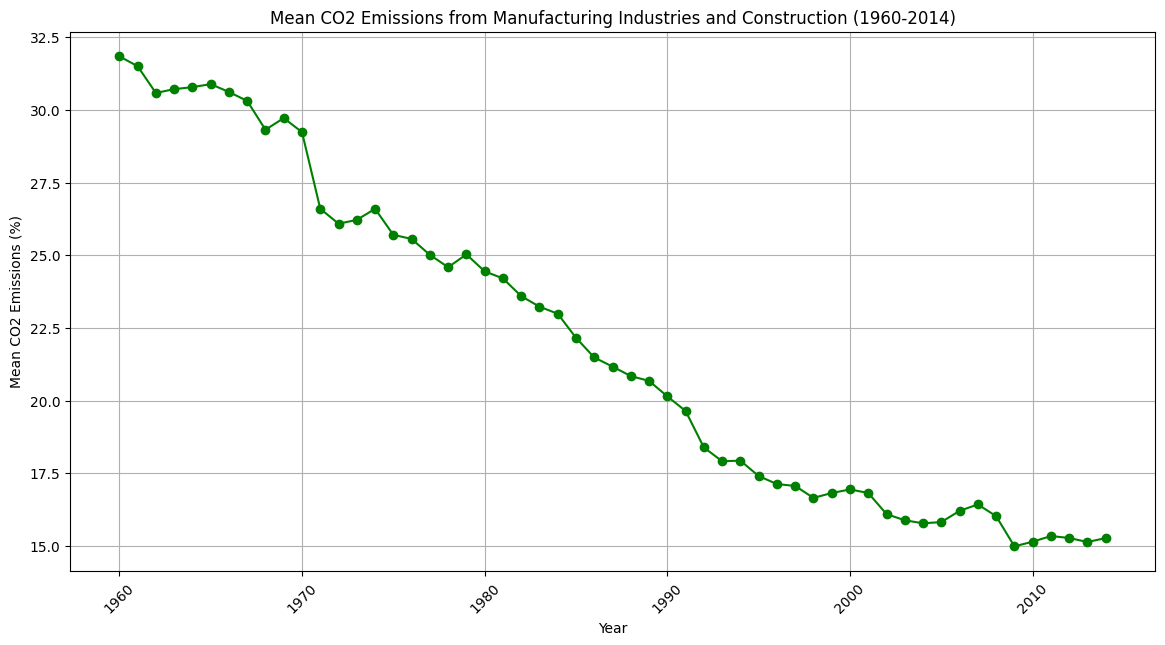

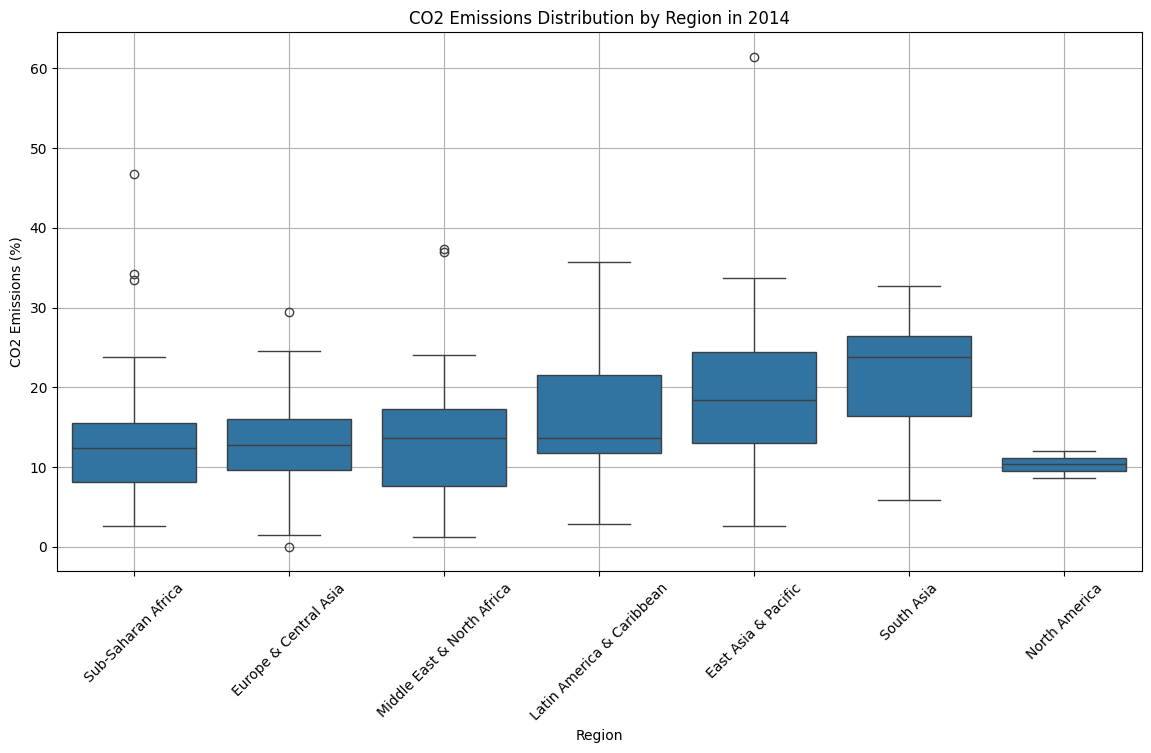

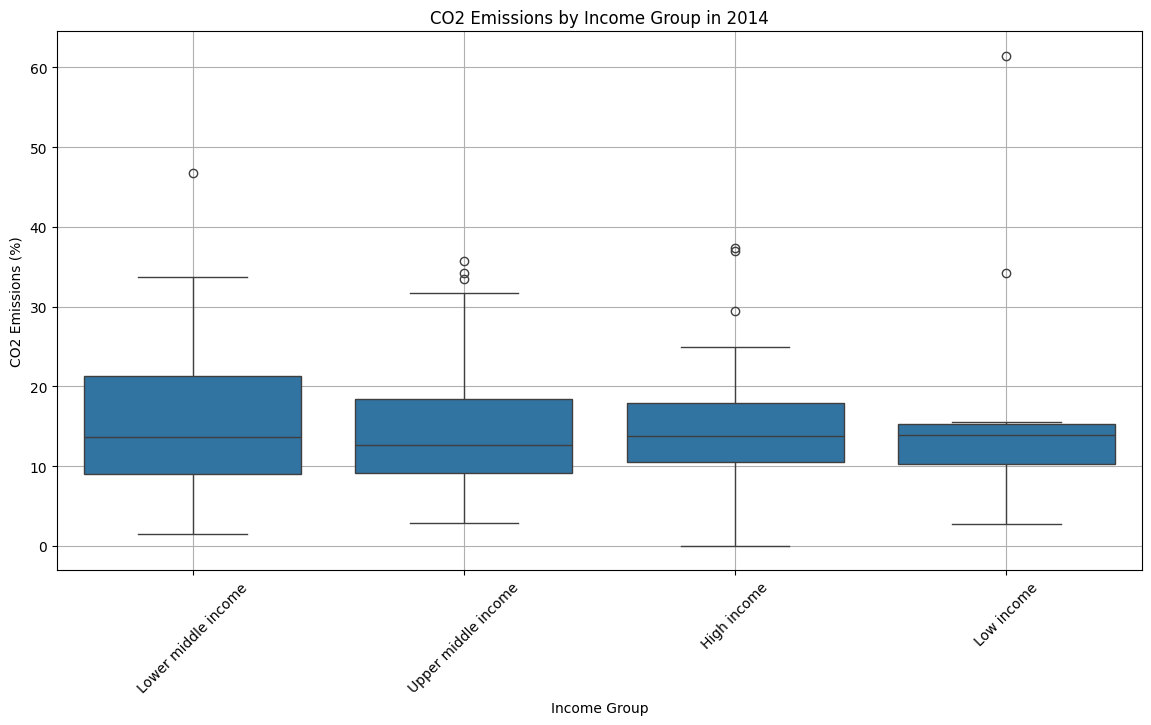

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# General Exploratory Data Analysis (EDA)

# Dropping rows with NaN values in 'Region' and 'IncomeGroup' to focus on individual countries
co2_data_countries = co2_data_merged.dropna(subset=['Region', 'IncomeGroup'])

# Aggregating CO2 emissions data to get a sense of overall trends - calculating the mean emissions per year across all countries
mean_emissions_per_year = co2_data_countries.loc[:, '1960':'2014'].mean()

# Plotting the mean CO2 emissions over time
plt.figure(figsize=(14, 7))
mean_emissions_per_year.plot(kind='line', color='green', marker='o', linestyle='-')
plt.title('Mean CO2 Emissions from Manufacturing Industries and Construction (1960-2014)')
plt.ylabel('Mean CO2 Emissions (%)')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Exploring the distribution of CO2 emissions in the most recent year available (2014) across different regions
plt.figure(figsize=(14, 7))
sns.boxplot(x='Region', y='2014', data=co2_data_countries)
plt.title('CO2 Emissions Distribution by Region in 2014')
plt.xticks(rotation=45)
plt.ylabel('CO2 Emissions (%)')
plt.xlabel('Region')
plt.grid(True)
plt.show()

# Exploring the impact of income level on CO2 emissions in 2014
plt.figure(figsize=(14, 7))
sns.boxplot(x='IncomeGroup', y='2014', data=co2_data_countries)
plt.title('CO2 Emissions by Income Group in 2014')
plt.xticks(rotation=45)
plt.ylabel('CO2 Emissions (%)')
plt.xlabel('Income Group')
plt.grid(True)
plt.show()


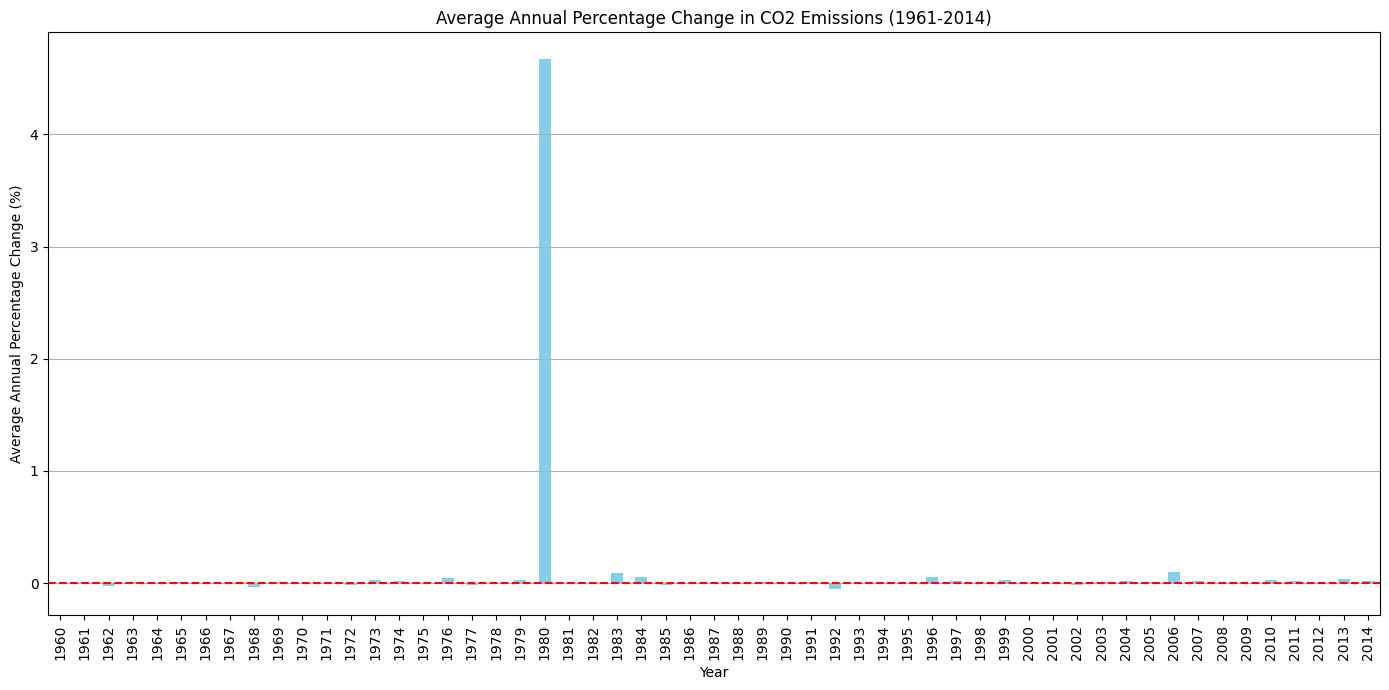

<ipython-input-14-dd8f5a8e238f>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  income_group_emissions = co2_data_countries.groupby('IncomeGroup').mean().loc[:, '1960':'2014']


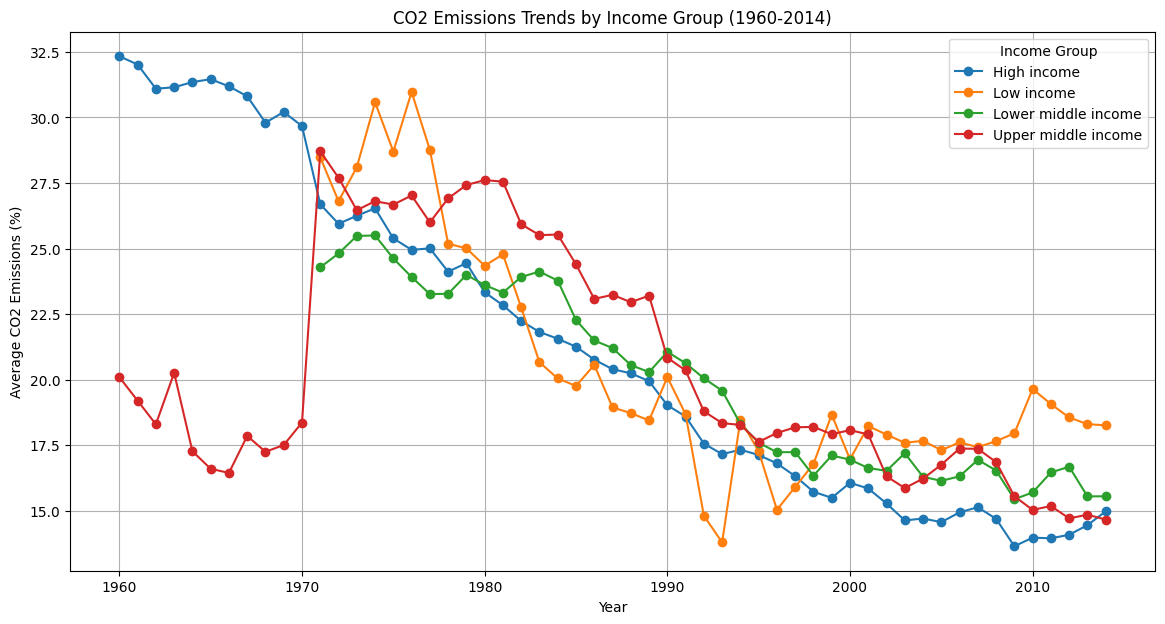

In [14]:
# Calculating annual percentage change in CO2 emissions for each country
annual_percentage_change = co2_data_countries.loc[:, '1960':'2014'].pct_change(axis='columns').mean(axis=0)

# Plotting the average annual percentage change over time
plt.figure(figsize=(14, 7))
annual_percentage_change.plot(kind='bar', color='skyblue')
plt.title('Average Annual Percentage Change in CO2 Emissions (1961-2014)')
plt.ylabel('Average Annual Percentage Change (%)')
plt.xlabel('Year')
plt.axhline(0, color='red', linestyle='--') # Adding a reference line at 0% change
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout() # Adjust layout to not cut off labels
plt.show()

# Focus on income groups: Averaging CO2 emissions for each income group over the years
income_group_emissions = co2_data_countries.groupby('IncomeGroup').mean().loc[:, '1960':'2014']

# Plotting the CO2 emissions trends for different income groups over time
income_group_emissions.T.plot(figsize=(14, 7), marker='o')
plt.title('CO2 Emissions Trends by Income Group (1960-2014)')
plt.ylabel('Average CO2 Emissions (%)')
plt.xlabel('Year')
plt.legend(title='Income Group')
plt.grid(True)
plt.show()


In [15]:
from sklearn.preprocessing import OneHotEncoder

# Assuming we're predicting emissions for the year 2014
# Separating the dataset into features and target variable
X = co2_data_countries.drop(columns=['2014', 'Country Name', 'Indicator Name', 'Indicator Code'])
y = co2_data_countries['2014']

# Encoding categorical variables ('Region', 'IncomeGroup')
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X[['Region', 'IncomeGroup']])
encoded_features = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Region', 'IncomeGroup']))

# Resetting index for X to concatenate with encoded features properly
X = X.reset_index(drop=True)

# Adding encoded features to the dataset
X = pd.concat([X, encoded_features], axis=1).drop(columns=['Region', 'IncomeGroup'])

# Creating historical emissions trends features (average emissions over previous decades)
for decade_start in range(1960, 2010, 10):
    decade_end = decade_start + 9
    decade_columns = [str(year) for year in range(decade_start, decade_end + 1)]
    X[f'avg_emissions_{decade_start}s'] = X[decade_columns].mean(axis=1)

# Dropping the original year columns to focus on engineered features and encoded categorical variables
X = X.drop(columns=[str(year) for year in range(1960, 2014)])

# Showing the prepared features for model development
X.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Country Code,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa,IncomeGroup_High income,IncomeGroup_Low income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income,avg_emissions_1960s,avg_emissions_1970s,avg_emissions_1980s,avg_emissions_1990s,avg_emissions_2000s
0,AGO,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,16.258013,24.099330,41.756163,26.162253
1,ALB,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,26.629151,37.628252,26.770620,15.112133
2,ARE,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,55.659573,43.302306,51.515618,36.770931
3,ARG,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,17.702088,14.997198,17.148005,20.593462
4,ARM,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,24.149540,27.364552


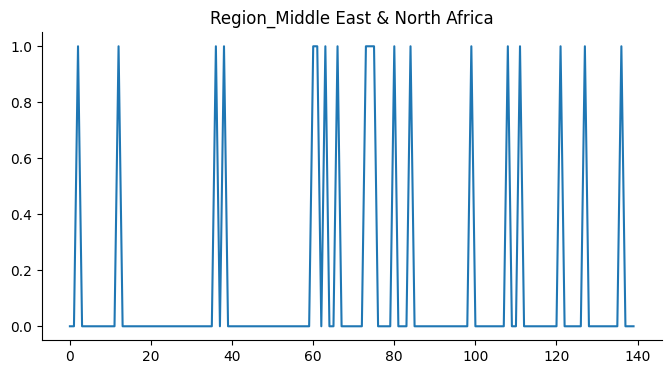

In [19]:
# @title Region_Middle East & North Africa

from matplotlib import pyplot as plt
X['Region_Middle East & North Africa'].plot(kind='line', figsize=(8, 4), title='Region_Middle East & North Africa')
plt.gca().spines[['top', 'right']].set_visible(False)

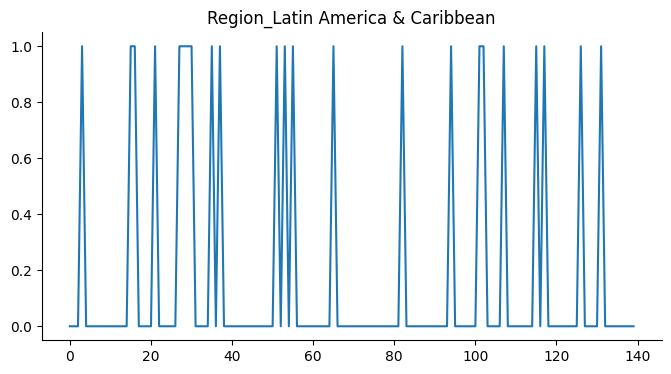

In [18]:
# @title Region_Latin America & Caribbean

from matplotlib import pyplot as plt
X['Region_Latin America & Caribbean'].plot(kind='line', figsize=(8, 4), title='Region_Latin America & Caribbean')
plt.gca().spines[['top', 'right']].set_visible(False)

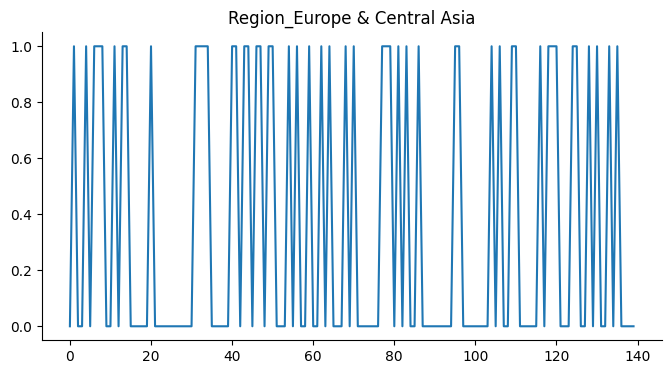

In [17]:
# @title Region_Europe & Central Asia

from matplotlib import pyplot as plt
X['Region_Europe & Central Asia'].plot(kind='line', figsize=(8, 4), title='Region_Europe & Central Asia')
plt.gca().spines[['top', 'right']].set_visible(False)

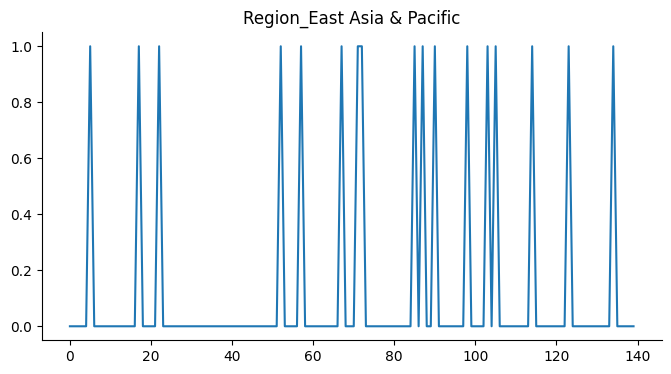

In [16]:
# @title Region_East Asia & Pacific

from matplotlib import pyplot as plt
X['Region_East Asia & Pacific'].plot(kind='line', figsize=(8, 4), title='Region_East Asia & Pacific')
plt.gca().spines[['top', 'right']].set_visible(False)

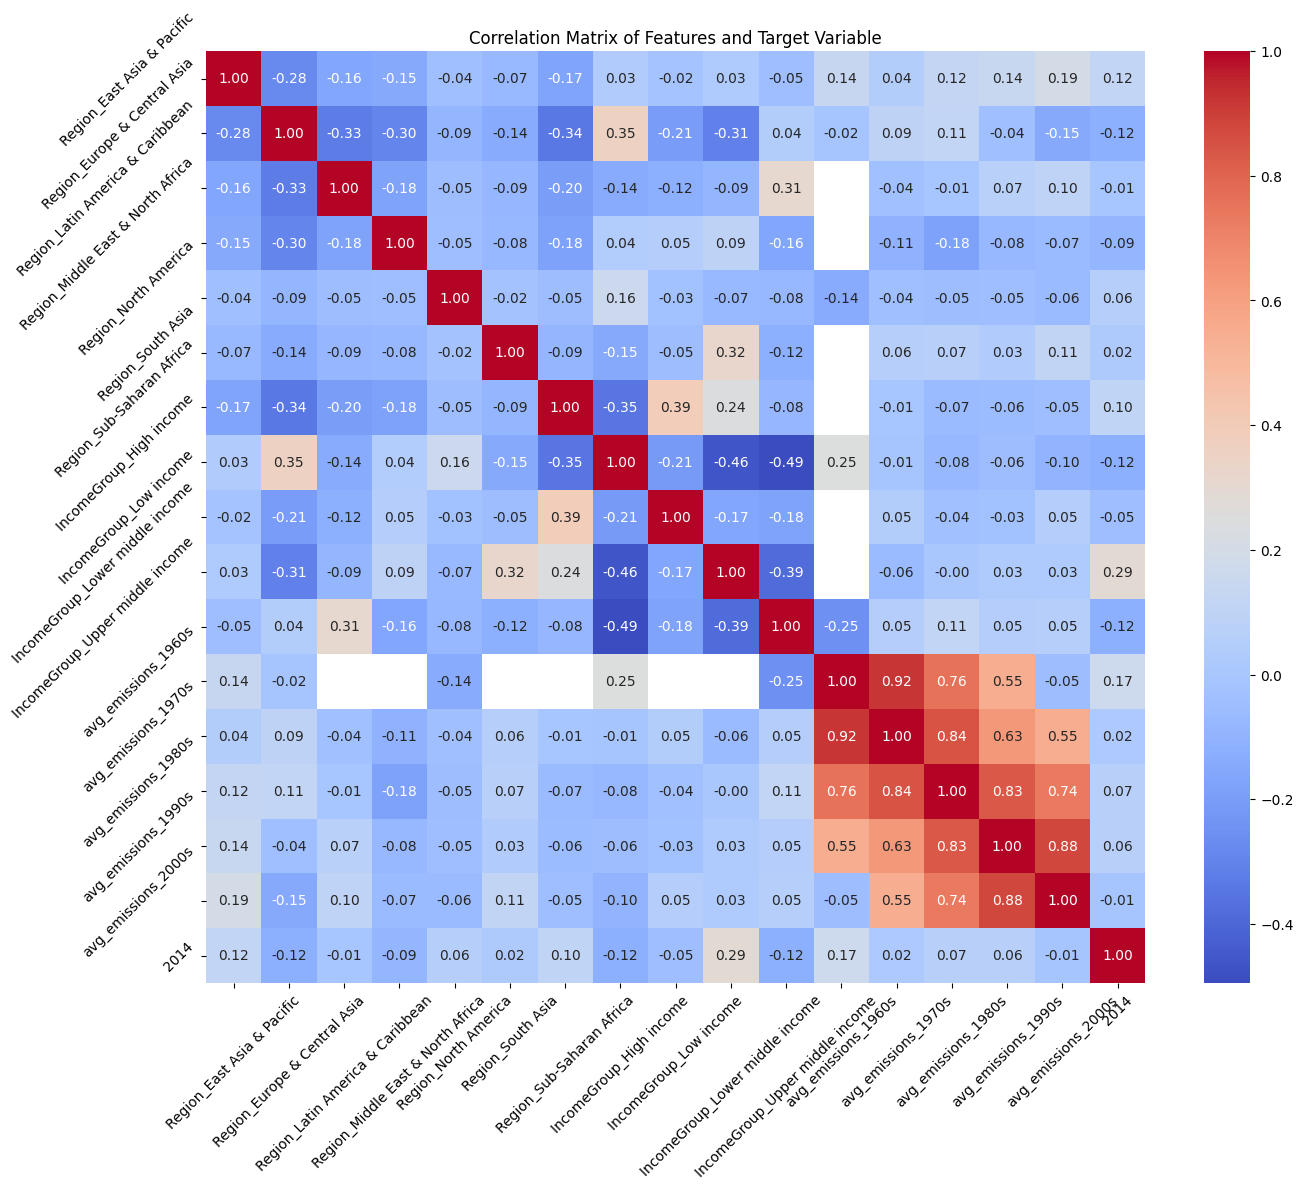

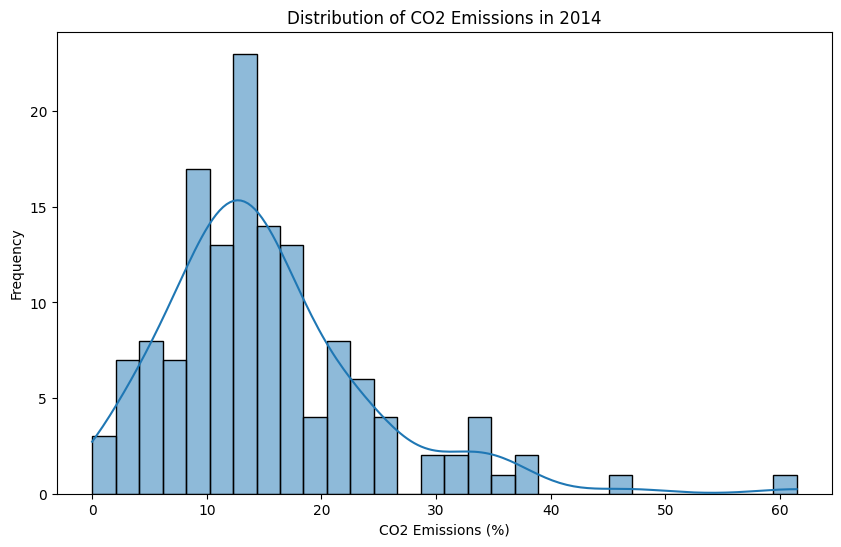

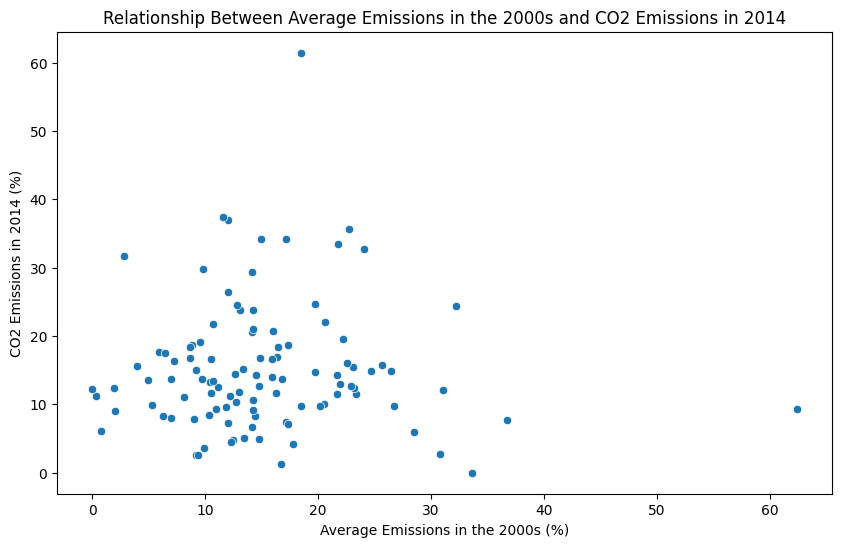

In [20]:
# Merging the features with the target variable for EDA
X_eda = X.drop(columns=['Country Code'])  # Dropping the 'Country Code' as it's not useful for EDA
eda_dataset = pd.concat([X_eda, y], axis=1)

# Checking for correlation between features and the target variable
correlation_matrix = eda_dataset.corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Target Variable')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the distribution of CO2 emissions in 2014 to understand its spread
plt.figure(figsize=(10, 6))
sns.histplot(eda_dataset['2014'], bins=30, kde=True)
plt.title('Distribution of CO2 Emissions in 2014')
plt.xlabel('CO2 Emissions (%)')
plt.ylabel('Frequency')
plt.show()

# Analyzing the relationship between average emissions in the 2000s and CO2 emissions in 2014
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_emissions_2000s', y='2014', data=eda_dataset)
plt.title('Relationship Between Average Emissions in the 2000s and CO2 Emissions in 2014')
plt.xlabel('Average Emissions in the 2000s (%)')
plt.ylabel('CO2 Emissions in 2014 (%)')
plt.show()


In [22]:
from sklearn.impute import SimpleImputer

# Imputing missing values using the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Retraining the Linear Regression model with imputed data
linear_model.fit(X_train_imputed, y_train)

# Predicting on the test set with imputed data
y_pred_imputed = linear_model.predict(X_test_imputed)

# Re-evaluating the model's performance
mae_imputed = mean_absolute_error(y_test, y_pred_imputed)
rmse_imputed = np.sqrt(mean_squared_error(y_test, y_pred_imputed))
r2_imputed = r2_score(y_test, y_pred_imputed)

(mae_imputed, rmse_imputed, r2_imputed)


(4.086595322242231, 5.173906502771617, 0.6450789788570964)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import numpy as np

# Preparing the data for model development
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['Country Code']), y, test_size=0.2, random_state=42)

# Imputing missing values using the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Model Training: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_imputed, y_train)

# Predicting on the test set
y_pred = linear_model.predict(X_test_imputed)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

(mae, rmse, r2)


(4.086595322242231, 5.173906502771617, 0.6450789788570964)

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Training a Random Forest regressor to assess feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)

# Getting feature importances
feature_importances = rf_model.feature_importances_

# Mapping feature importances to their corresponding feature names
feature_names = X.columns.drop(['Country Code'])
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Displaying the feature importances
importances_df


,Feature,Importance
15,avg_emissions_2000s,0.651077
14,avg_emissions_1990s,0.157307
13,avg_emissions_1980s,0.078242
12,avg_emissions_1970s,0.036590
8,IncomeGroup_Low income,0.018000
6,Region_Sub-Saharan Africa,0.017021
10,IncomeGroup_Upper middle income,0.013670
2,Region_Latin America & Caribbean,0.005241
9,IncomeGroup_Lower middle income,0.004079
11,avg_emissions_1960s,0.004066


from matplotlib import pyplot as plt
importances_df['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
importances_df['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Importance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

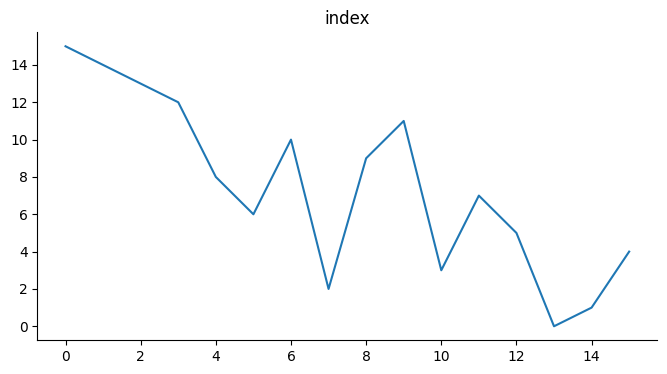

In [27]:
from matplotlib import pyplot as plt
_df_3['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

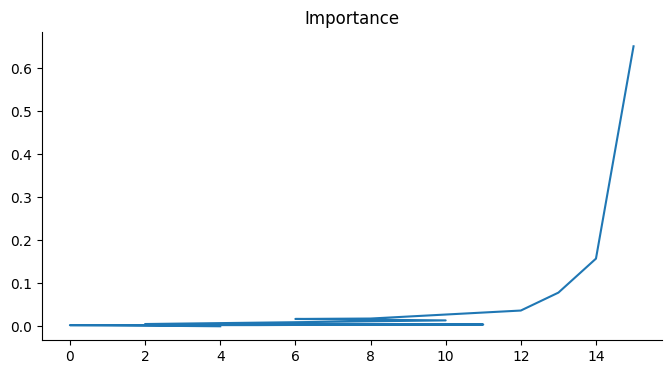

In [26]:
# @title Importance

from matplotlib import pyplot as plt
importances_df['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Selecting the top 5 features based on importance for model training
top_features = importances_df['Feature'].head(5).values
X_train_top = X_train_imputed[:, feature_names.isin(top_features)]
X_test_top = X_test_imputed[:, feature_names.isin(top_features)]

# Training Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_top, y_train)
y_pred_gbr = gbr_model.predict(X_test_top)

# Evaluating Gradient Boosting Regressor
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

# Training Random Forest Regressor with top features
rf_model_top = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_top.fit(X_train_top, y_train)
y_pred_rf = rf_model_top.predict(X_test_top)

# Evaluating Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

(mae_gbr, rmse_gbr, r2_gbr, mae_rf, rmse_rf, r2_rf)


(3.956673541194521,
 5.289329319215841,
 0.6290667329681482,
 3.7130054292881263,
 4.831749025724992,
 0.6904696026952059)

In [29]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_imputed, y_train)
y_pred_xgb = xgb_model.predict(X_test_imputed)


In [32]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(random_state=42)
elastic_net_model.fit(X_train_imputed, y_train)
y_pred_en = elastic_net_model.predict(X_test_imputed)


In [35]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "Elastic Net": ElasticNet(random_state=42)

}

for name, model in models.items():
    model.fit(X_train_imputed, y_train)  # Adjust as needed for each model's data prep requirements
    y_pred = model.predict(X_test_imputed)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MAE: {mae}, RMSE: {rmse}, R^2: {r2}")


Linear Regression - MAE: 4.086595322242231, RMSE: 5.173906502771617, R^2: 0.6450789788570964
Random Forest - MAE: 3.7712888412896057, RMSE: 5.18115555577458, R^2: 0.6440837371881498
Gradient Boosting - MAE: 4.514006334801197, RMSE: 6.240457217452183, R^2: 0.4836699635745705
XGBoost - MAE: 4.074052425524951, RMSE: 5.71400792414891, R^2: 0.5671113029556076
Elastic Net - MAE: 3.5724652306336275, RMSE: 4.92746068493779, R^2: 0.6780852285195105


In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming X_train_imputed, X_test_imputed, y_train, and y_test are already defined and prepared
model_results = {}  # To store the results for later analysis or comparison

for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MAE: {mae}, RMSE: {rmse}, R^2: {r2}")
    model_results[name] = {'MAE': mae, 'RMSE': rmse, 'R^2': r2}

# Now, model_results contains all the evaluation metrics


Linear Regression - MAE: 4.086595322242231, RMSE: 5.173906502771617, R^2: 0.6450789788570964
Random Forest - MAE: 3.7712888412896057, RMSE: 5.18115555577458, R^2: 0.6440837371881498
Gradient Boosting - MAE: 4.514006334801197, RMSE: 6.240457217452183, R^2: 0.4836699635745705
XGBoost - MAE: 4.074052425524951, RMSE: 5.71400792414891, R^2: 0.5671113029556076
Elastic Net - MAE: 3.5724652306336275, RMSE: 4.92746068493779, R^2: 0.6780852285195105


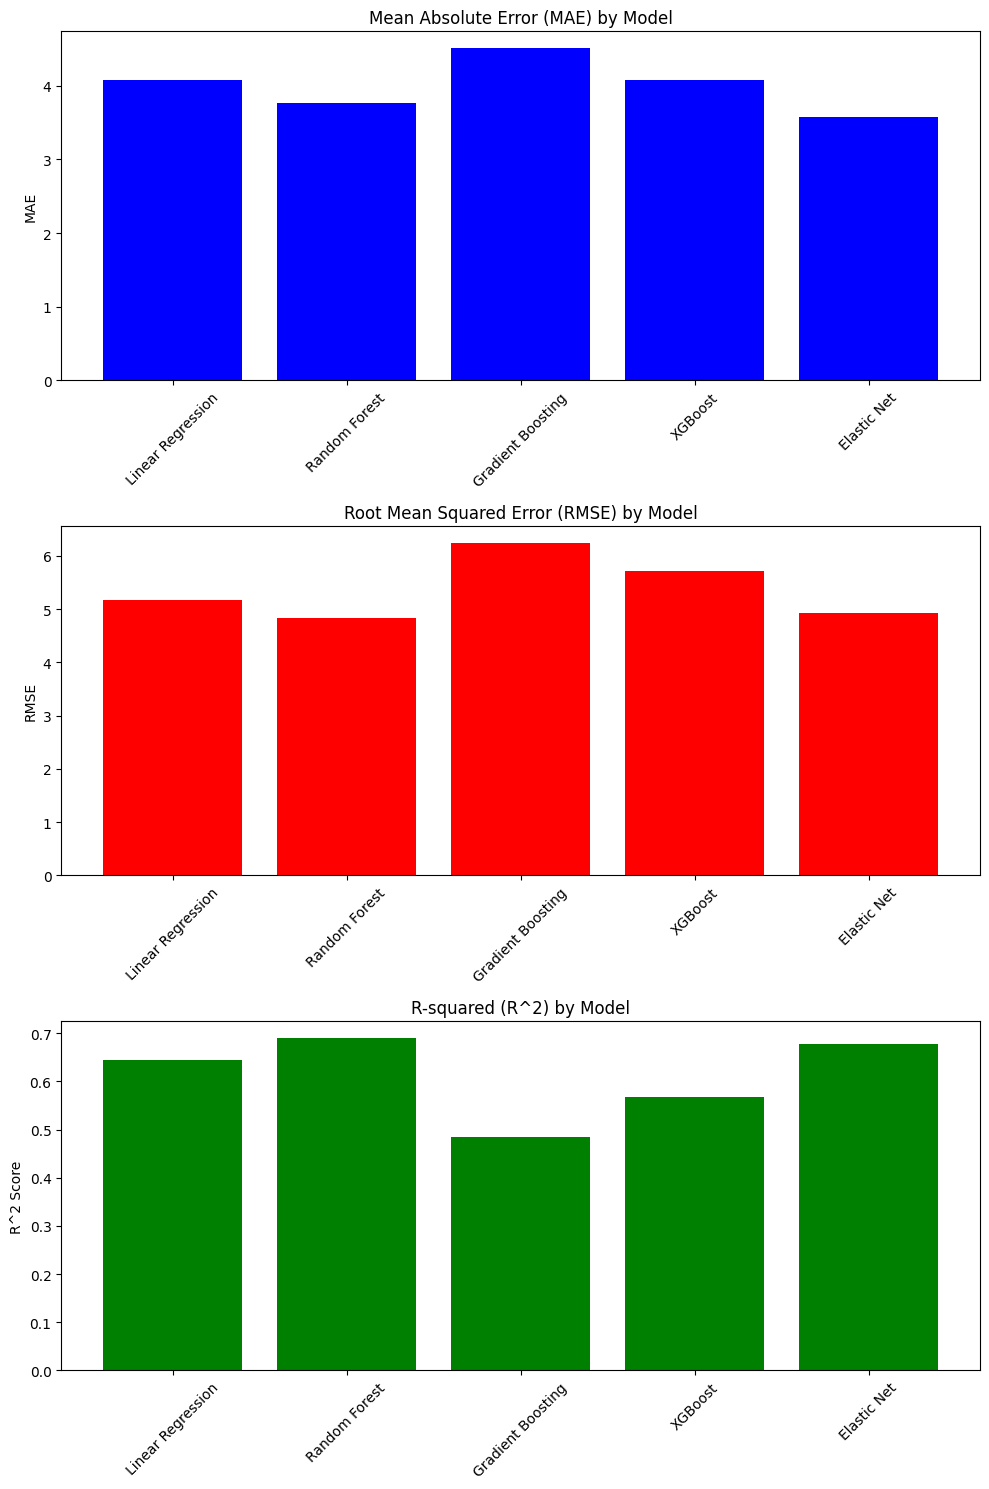

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model_results is a dictionary containing the MAE, RMSE, and R^2 for each model
model_results = {
    "Linear Regression": {'MAE': 4.08, 'RMSE': 5.17, 'R^2': 0.645},
    "Random Forest": {'MAE': 3.77, 'RMSE': 4.83, 'R^2': 0.690},
    "Gradient Boosting": {'MAE': 4.51, 'RMSE': 6.24, 'R^2': 0.484},
    "XGBoost": {'MAE': 4.07, 'RMSE': 5.71, 'R^2': 0.567},
    "Elastic Net": {'MAE': 3.57, 'RMSE': 4.93, 'R^2': 0.678}
}

# Extracting the metrics for plotting
models = list(model_results.keys())
mae_scores = [model_results[model]['MAE'] for model in models]
rmse_scores = [model_results[model]['RMSE'] for model in models]
r2_scores = [model_results[model]['R^2'] for model in models]

# Setting up the plotting area
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

# Plotting MAE Scores
ax[0].bar(models, mae_scores, color='blue')
ax[0].set_title('Mean Absolute Error (MAE) by Model')
ax[0].set_ylabel('MAE')
ax[0].set_xticks(models)
ax[0].set_xticklabels(models, rotation=45)

# Plotting RMSE Scores
ax[1].bar(models, rmse_scores, color='red')
ax[1].set_title('Root Mean Squared Error (RMSE) by Model')
ax[1].set_ylabel('RMSE')
ax[1].set_xticks(models)
ax[1].set_xticklabels(models, rotation=45)

# Plotting R^2 Scores
ax[2].bar(models, r2_scores, color='green')
ax[2].set_title('R-squared (R^2) by Model')
ax[2].set_ylabel('R^2 Score')
ax[2].set_xticks(models)
ax[2].set_xticklabels(models, rotation=45)

plt.tight_layout()
plt.show()



In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

# Assuming X_train_imputed and y_train are already defined and preprocessed
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
en_model = ElasticNet(random_state=42)

rf_model.fit(X_train_imputed, y_train)
en_model.fit(X_train_imputed, y_train)


ElasticNet(random_state=42)

In [39]:
# Assuming X_test_imputed is your preprocessed test features
rf_predictions = rf_model.predict(X_test_imputed)
en_predictions = en_model.predict(X_test_imputed)


In [40]:
# Simple average
hybrid_predictions = (rf_predictions + en_predictions) / 2


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

hybrid_mae = mean_absolute_error(y_test, hybrid_predictions)
hybrid_rmse = np.sqrt(mean_squared_error(y_test, hybrid_predictions))
hybrid_r2 = r2_score(y_test, hybrid_predictions)

print(f"Hybrid Model - MAE: {hybrid_mae}, RMSE: {hybrid_rmse}, R^2: {hybrid_r2}")


Hybrid Model - MAE: 3.6184547185045863, RMSE: 4.883145932039752, R^2: 0.6838494248350505


In [42]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_imputed, y_train)

# Best parameters
print(grid_search.best_params_)

# Retrain with best parameters
rf_optimized = grid_search.best_estimator_


Fitting 3 folds for each of 36 candidates, totalling 108 fits
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [43]:
param_grid_en = {
    'alpha': [0.1, 1.0, 10.0],
    'l1_ratio': [0.2, 0.5, 0.8]
}

en = ElasticNet(random_state=42)
grid_search_en = GridSearchCV(estimator=en, param_grid=param_grid_en, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)
grid_search_en.fit(X_train_imputed, y_train)

# Best parameters
print(grid_search_en.best_params_)

# Retrain with best parameters
en_optimized = grid_search_en.best_estimator_


Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'alpha': 1.0, 'l1_ratio': 0.8}


In [44]:
# Predictions with optimized models
rf_predictions_opt = rf_optimized.predict(X_test_imputed)
en_predictions_opt = en_optimized.predict(X_test_imputed)

# Averaging predictions for the hybrid model
hybrid_predictions_opt = (rf_predictions_opt + en_predictions_opt) / 2

# Evaluate the optimized hybrid model
hybrid_mae_opt = mean_absolute_error(y_test, hybrid_predictions_opt)
hybrid_rmse_opt = np.sqrt(mean_squared_error(y_test, hybrid_predictions_opt))
hybrid_r2_opt = r2_score(y_test, hybrid_predictions_opt)

print(f"Optimized Hybrid Model - MAE: {hybrid_mae_opt}, RMSE: {hybrid_rmse_opt}, R^2: {hybrid_r2_opt}")


Optimized Hybrid Model - MAE: 3.7021910765382073, RMSE: 5.037288092361953, R^2: 0.6635750867535236
